# Factorial Design

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Two-Factor-ANOVA" data-toc-modified-id="Two-Factor-ANOVA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Two-Factor ANOVA</a></span><ul class="toc-item"><li><span><a href="#Load-Battery-Data" data-toc-modified-id="Load-Battery-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Battery Data</a></span></li><li><span><a href="#Model-fitting-and-ANOVA-table" data-toc-modified-id="Model-fitting-and-ANOVA-table-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Model fitting and ANOVA table</a></span></li><li><span><a href="#Interaction-plot" data-toc-modified-id="Interaction-plot-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Interaction plot</a></span></li><li><span><a href="#Model-assumption-check" data-toc-modified-id="Model-assumption-check-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Model assumption check</a></span></li><li><span><a href="#Tukey-HSD-Test-for-specific-factor-level" data-toc-modified-id="Tukey-HSD-Test-for-specific-factor-level-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Tukey HSD Test for specific factor level</a></span><ul class="toc-item"><li><span><a href="#Compute-margin-error-for-C.I." data-toc-modified-id="Compute-margin-error-for-C.I.-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Compute margin error for C.I.</a></span></li></ul></li><li><span><a href="#Your-Turn----Activity-II:-Missile-System-and-Propellant-Type" data-toc-modified-id="Your-Turn----Activity-II:-Missile-System-and-Propellant-Type-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Your Turn -- Activity II: Missile System and Propellant Type</a></span></li></ul></li><li><span><a href="#Three-factor-ANOVA" data-toc-modified-id="Three-factor-ANOVA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Three-factor ANOVA</a></span><ul class="toc-item"><li><span><a href="#Load-data-and-fit-model" data-toc-modified-id="Load-data-and-fit-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load data and fit model</a></span></li><li><span><a href="#Main-and-interaction-effect-plots" data-toc-modified-id="Main-and-interaction-effect-plots-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Main and interaction effect plots</a></span></li><li><span><a href="#Your-Turn----Activity-III:-Exercise-Tolerance" data-toc-modified-id="Your-Turn----Activity-III:-Exercise-Tolerance-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Your Turn -- Activity III: Exercise Tolerance</a></span></li></ul></li></ul></div>

In [1]:
print('\nEnabling interactive shell outputs ...')
print('   Use command pass; to disable cell text outputs')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore') 
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm



%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


Enabling interactive shell outputs ...
   Use command pass; to disable cell text outputs


## Two-Factor ANOVA

### Load Battery Data

In [2]:
import pandas as pd

battery_data = pd.read_excel('lect05-factorial.xlsx', 
                             sheet_name='Battery',header=0)
battery_data

,Lifetime,Material,Temp
0,130,M1,T015
1,155,M1,T015
2,74,M1,T015
3,180,M1,T015
4,34,M1,T070
5,40,M1,T070
6,80,M1,T070
7,75,M1,T070
8,20,M1,T125
9,70,M1,T125


### Model fitting and ANOVA table

In [5]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'Lifetime ~ Material + Temp + Material:Temp'
mdl = ols(formula, data=battery_data).fit()
aov_table = anova_lm(mdl, typ=1) 
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Material,2.0,10683.722222,5341.861111,7.911372,1.976083e-03
Temp,2.0,39118.722222,19559.361111,28.967692,1.908596e-07
Material:Temp,4.0,9613.777778,2403.444444,3.559535,1.861117e-02
Residual,27.0,18230.750000,675.212963,NaN,NaN


### Interaction plot

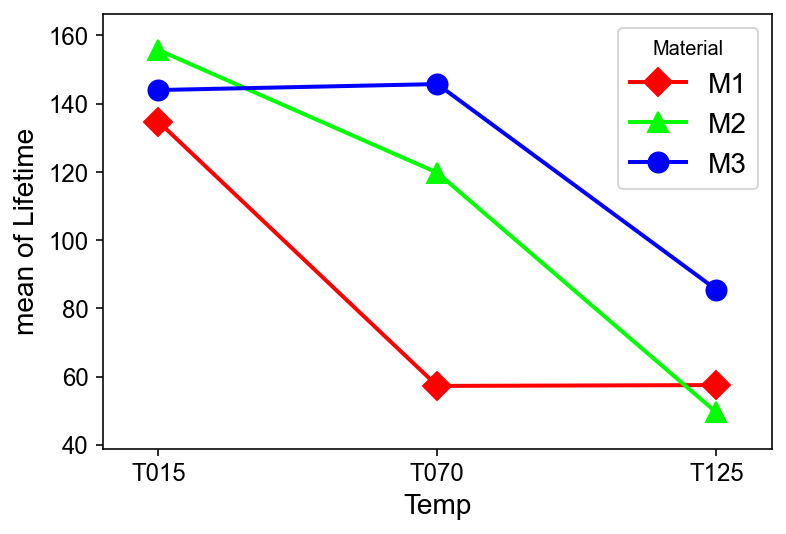

In [6]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(battery_data.Temp, 
                       battery_data.Material, 
                       battery_data.Lifetime, 
                       markers=['D','^','o'], ms=10) 

### Model assumption check

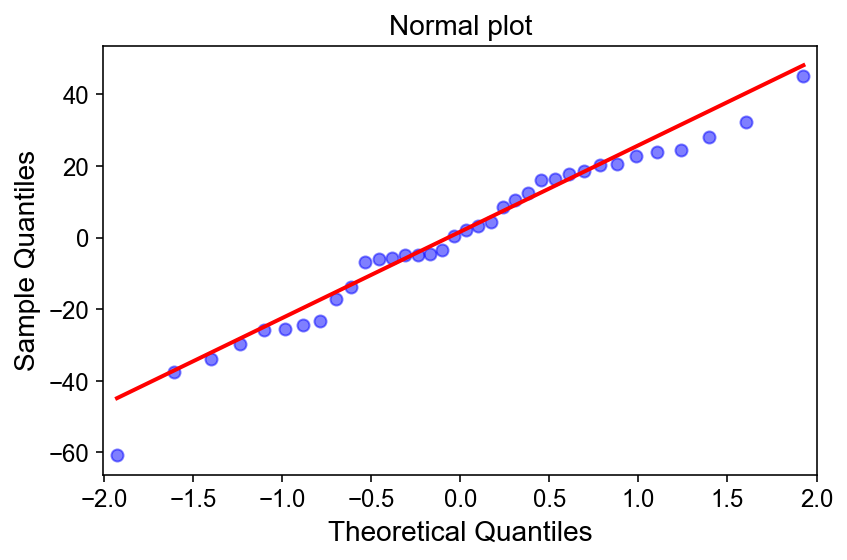

In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.graphics.qqplot(mdl.resid,line='q',alpha=0.5,ms=6)
plt.title('Normal plot')
plt.tight_layout()
pass;

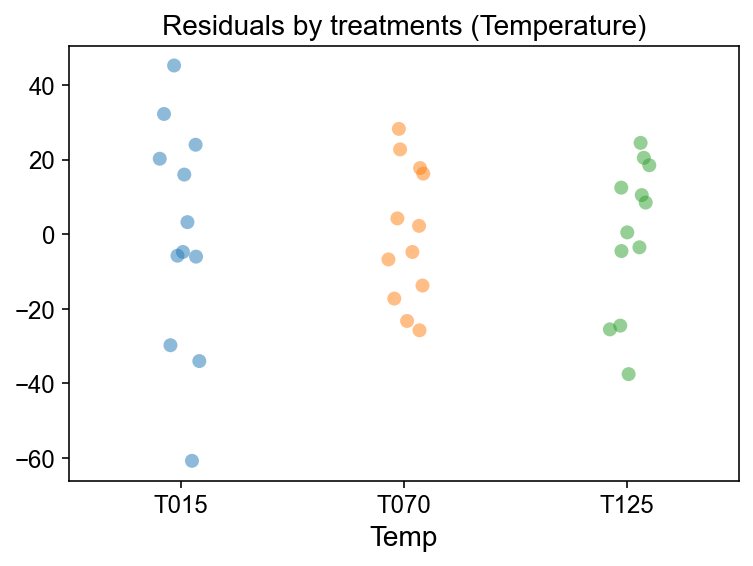

In [8]:
import seaborn as sns

#fig = plt.figure(figsize=(10,8))
    
#resid_df = pd.DataFrame({'Group':battery_data['Temp'], 'Resid':mdl.resid})
#sns.stripplot(x='Group', y='Resid', data=resid_df);
sns.stripplot(x=battery_data['Temp'], y=mdl.resid, alpha=0.5, size=7);
plt.title('Residuals by treatments (Temperature)')
pass;

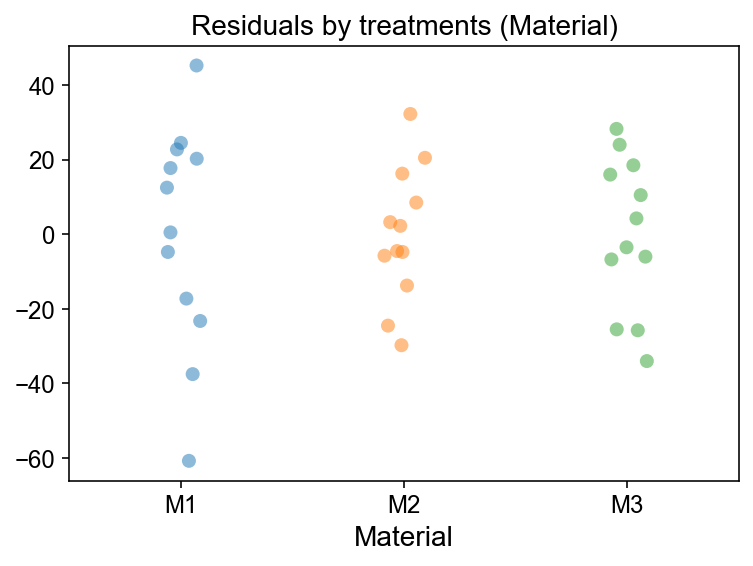

In [9]:
import seaborn as sns

#fig = plt.figure(figsize=(10,8))
    
#resid_df = pd.DataFrame({'Group':battery_data['Temp'], 'Resid':mdl.resid})
#sns.stripplot(x='Group', y='Resid', data=resid_df);
sns.stripplot(x=battery_data['Material'], y=mdl.resid, alpha=0.5, size=7);
plt.title('Residuals by treatments (Material)')
pass;

### Tukey HSD Test for specific factor level

#### Compute margin error for C.I.

In [10]:
from statsmodels.stats.libqsturng import qsturng

a = len(battery_data.Material.unique())
f = mdl.df_resid
n = battery_data.groupby(['Material','Temp']).count().reset_index().iloc[0,-1]

In [11]:
alpha=0.05
q_crit = qsturng(1-alpha, a, f)
margin_err = q_crit*np.sqrt(mdl.mse_resid/n) 
print('q-critical value: {:.2f}'.format(q_crit))
print('Margin error: {:.2f}'.format(margin_err))

q-critical value: 3.51
Margin error: 45.55


In [ ]:
#ต้องเอาค่า Margin error ไปเทียบกับ mean differences ถ้าสมมติ mean differences=0 มันจะ +- ช่วงก็จะค่อม 0

Compare the margin error to the mean differences to determine if the mean differences are significant.

###  Your Turn -- Activity II: Missile System and Propellant Type  

In [50]:
burningrate_data = pd.read_excel('lect05-factorial.xlsx', sheet_name='Missile', header=0)
burningrate_data

,BurningRate,System,Propellant
0,34.0,S1,P1
1,32.7,S1,P1
2,30.1,S1,P2
3,32.8,S1,P2
4,29.8,S1,P3
5,26.7,S1,P3
6,29.0,S1,P4
7,28.9,S1,P4
8,32.0,S2,P1
9,33.2,S2,P1


In [41]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula1 = 'BurningRate ~ System + Propellant + System:Propellant'
mdl1 = ols(formula1, data=burningrate_data).fit()
aov_table1 = anova_lm(mdl1, typ=1) 
aov_table1

,df,sum_sq,mean_sq,F,PR(>F)
System,2.0,14.523333,7.261667,5.844400,0.016898
Propellant,3.0,40.081667,13.360556,10.752962,0.001020
System:Propellant,6.0,22.163333,3.693889,2.972949,0.051168
Residual,12.0,14.910000,1.242500,NaN,NaN


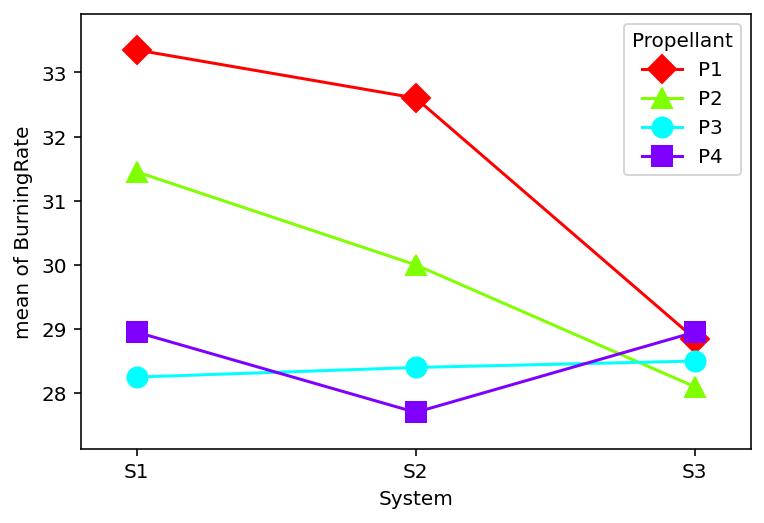

In [42]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(burningrate_data.System, 
                       burningrate_data.Propellant, 
                       burningrate_data.BurningRate, 
                       markers=['D','^','o','s'], ms=10) 

In [54]:
burningrate_data_fixs1 = burningrate_data.query( 'System=="S1"')
burningrate_data_fixs1

,BurningRate,System,Propellant
0,34.0,S1,P1
1,32.7,S1,P1
2,30.1,S1,P2
3,32.8,S1,P2
4,29.8,S1,P3
5,26.7,S1,P3
6,29.0,S1,P4
7,28.9,S1,P4


In [43]:
from statsmodels.stats.libqsturng import qsturng

a = len(burningrate_data.Propellant.unique())
f = mdl1.df_resid
n = burningrate_data.groupby(['Propellant','System']).count().reset_index().iloc[0,-1]

In [64]:
alpha= 0.05
q_crit = qsturng(1-alpha, a, f)
margin_err = q_crit*np.sqrt(mdl1.mse_resid/n)
print('q-critical value: {:.2f}'.format(q_crit))
print('Margin error: {:.2f}'.format(margin_err))

q-critical value: 4.20
Margin error: 3.31


In [65]:
group_mean = burningrate_data_fixs1.groupby('Propellant').aggregate({'BurningRate':'mean'}).BurningRate
group_mean

Propellant
P1    33.35
P2    31.45
P3    28.25
P4    28.95
Name: BurningRate, dtype: float64

In [67]:
from statsmodels.stats.libqsturng import qsturng


import itertools
allpairs=list(itertools.combinations(sorted(burningrate_data_fixs1.Propellant.unique()),2))

tukey_df = pd.DataFrame(allpairs, columns={'group1','group2'})
tukey_df['meandiff'] = tukey_df.apply(lambda x: group_mean[x['group2']] - group_mean[x['group1']], axis=1) 
tukey_df['lower'] = tukey_df.apply(lambda x: x['meandiff'] - margin_err, axis=1) 
tukey_df['upper'] = tukey_df.apply(lambda x: x['meandiff'] + margin_err, axis=1) 
tukey_df['reject'] = tukey_df.apply(lambda x: 'False' if x['lower'] < 0 and x['upper'] > 0 else 'True', axis=1) 
tukey_df

,group1,group2,meandiff,lower,upper,reject
0,P1,P2,-1.9,-5.209748,1.409748,False
1,P1,P3,-5.1,-8.409748,-1.790252,True
2,P1,P4,-4.4,-7.709748,-1.090252,True
3,P2,P3,-3.2,-6.509748,0.109748,False
4,P2,P4,-2.5,-5.809748,0.809748,False
5,P3,P4,0.7,-2.609748,4.009748,False


In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# alpha = Family-wise error rate
result=pairwise_tukeyhsd(burningrate_data['BurningRate'],burningrate_data['Propellant'],alpha=0.05)
print(result)
#result.plot_simultaneous();    
# Plot confidence intervals of all sample means
#plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    P1     P2    -1.75 0.2649 -4.3457 0.8457  False
    P1     P3  -3.2167 0.0119 -5.8123 -0.621   True
    P1     P4  -3.0667  0.017 -5.6623 -0.471   True
    P2     P3  -1.4667 0.4122 -4.0623  1.129  False
    P2     P4  -1.3167  0.502 -3.9123  1.279  False
    P3     P4     0.15    0.9 -2.4457 2.7457  False
---------------------------------------------------


## Three-factor ANOVA

### Load data and fit model

In [3]:
softdrink_data = pd.read_excel('lect05-factorial.xlsx', sheet_name='Softdrink', header=0)
softdrink_data

,Filldeviation,Carbonation,Pressure,Linespeed
0,-3,10,25,200
1,-1,10,25,200
2,-1,10,25,250
3,0,10,25,250
4,-1,10,30,200
5,0,10,30,200
6,1,10,30,250
7,1,10,30,250
8,0,12,25,200
9,1,12,25,200


In [13]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'Filldeviation ~ C(Carbonation) + C(Pressure) + C(Linespeed) + C(Carbonation):C(Pressure) + \
C(Carbonation):C(Linespeed) + C(Pressure):C(Linespeed) + C(Carbonation):C(Pressure):C(Linespeed)'
mdl = ols(formula, data=softdrink_data).fit()
aov_table = anova_lm(mdl) 
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Carbonation),2.0,252.750000,126.375000,178.411765,1.186249e-09
C(Pressure),1.0,45.375000,45.375000,64.058824,3.742257e-06
C(Linespeed),1.0,22.041667,22.041667,31.117647,1.202174e-04
C(Carbonation):C(Pressure),2.0,5.250000,2.625000,3.705882,5.580812e-02
C(Carbonation):C(Linespeed),2.0,0.583333,0.291667,0.411765,6.714939e-01
C(Pressure):C(Linespeed),1.0,1.041667,1.041667,1.470588,2.485867e-01
C(Carbonation):C(Pressure):C(Linespeed),2.0,1.083333,0.541667,0.764706,4.868711e-01
Residual,12.0,8.500000,0.708333,NaN,NaN


### Main and interaction effect plots

Text(0.5, 0, 'Carbonation (A)')

Text(0, 0.5, 'Average fill deviation')

Text(0.5, 0, 'Pressure (B)')

Text(0, 0.5, 'Average fill deviation')

Text(0.5, 0, 'Linespeed (C)')

Text(0, 0.5, 'Average fill deviation')

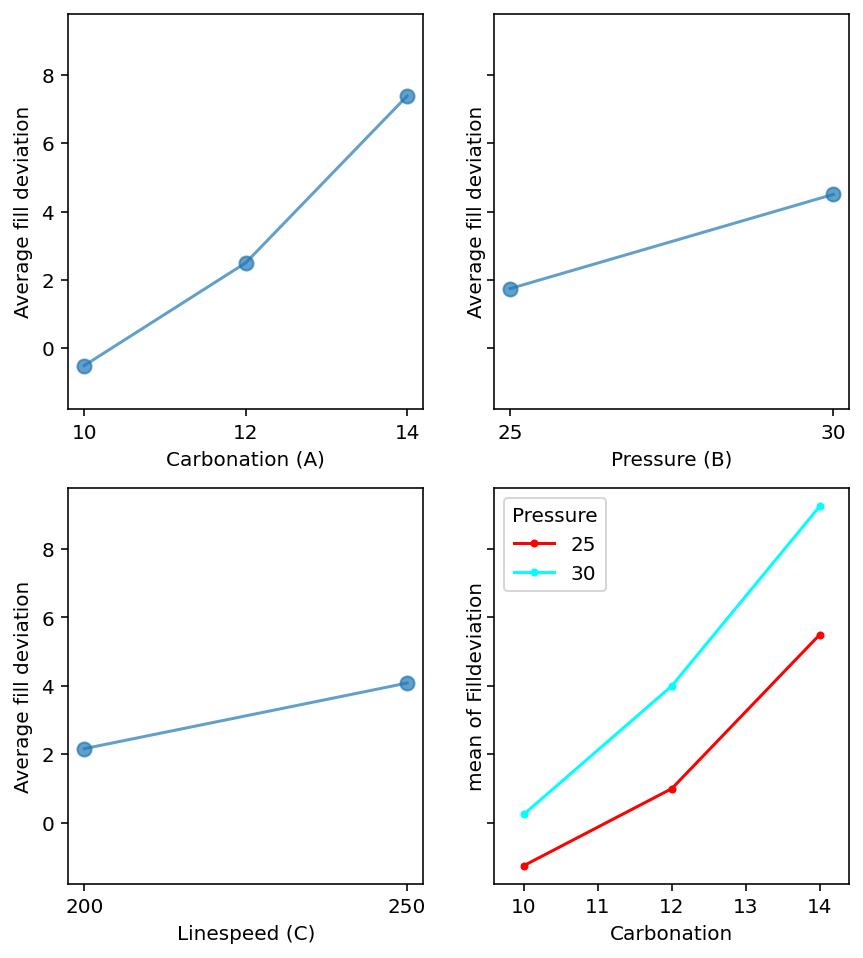

In [68]:
## Create figure with four subplots inside
# Main effect plots of Carbonation, Pressure and Linespeed (ax1, ax2, ax3)
# Carbonation-Pressure interaction plot (ax4)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, figsize=(7,8)) 


carb_effect=softdrink_data.groupby('Carbonation').aggregate({'Filldeviation':'mean'}).reset_index()
ax1.plot(carb_effect.Carbonation.astype('str'), carb_effect.Filldeviation,
        ms=7, marker='o', alpha=0.7)
ax1.set_xlabel('Carbonation (A)')
ax1.set_ylabel('Average fill deviation')

pressure_effect=softdrink_data.groupby('Pressure').aggregate({'Filldeviation':'mean'}).reset_index()
ax2.plot(pressure_effect.Pressure.astype('str'), pressure_effect.Filldeviation,
        ms=7, marker='o', alpha=0.7)
ax2.set_xlabel('Pressure (B)')
ax2.set_ylabel('Average fill deviation')

linespeed_effect=softdrink_data.groupby('Linespeed').aggregate({'Filldeviation':'mean'}).reset_index()
ax3.plot(linespeed_effect.Linespeed.astype('str'), linespeed_effect.Filldeviation,
        ms=7, marker='o', alpha=0.7)
ax3.set_xlabel('Linespeed (C)')
ax3.set_ylabel('Average fill deviation')

ax4 = interaction_plot(softdrink_data['Carbonation'],softdrink_data['Pressure'],softdrink_data['Filldeviation'],ax=ax4)